In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
data = pd.read_stata('C:/Users/10345/OneDrive/博士/IPEN_5140/replication1/replication_package_MS-ENI-20-00293-1/replication_package_MS-ENI-20-00293/regressions/data__assignee__nber_cat.dta')

### 任务1：强制保密对相同企业的后续创新影响

- 数据描述

  - 使用数据集 `data__assignee__nber_cat.dta`，限于1930到1960年的观察值。简要介绍数据结构，包括数据中的唯一标识、公司数量及缺失值情况。

In [4]:
df = data[(data['year'] >= 1930) & (data['year'] <= 1960)]

In [5]:
df.describe()

,nber_cat,osrd_contractor,year,patents,secret_patents,any_patent,self_total_secrate,self_incat_secrate,self_total_pre1939,self_incat_pre1939,...,self_incat_secrate_q1_t5,self_incat_secrate_q2_t1,self_incat_secrate_q2_t3,self_incat_secrate_q2_t4,self_incat_secrate_q2_t5,self_incat_secrate_q3_t1,self_incat_secrate_q3_t3,self_incat_secrate_q3_t4,self_incat_secrate_q3_t5,ones
count,2.717460e+06,2.717460e+06,2.717460e+06,2.717460e+06,2.717460e+06,2.717460e+06,751905.000000,503875.000000,2.717460e+06,2.717460e+06,...,503875.000000,503875.000000,503875.000000,503875.000000,503875.000000,503875.000000,503875.000000,503875.000000,503875.000000,2717460.0
mean,5.264795e+01,7.727805e-03,1.943600e+03,3.942145e-01,8.574183e-05,2.030963e-01,0.007749,0.006538,6.579836e+00,7.691282e-01,...,0.001084,0.000677,0.000677,0.000677,0.000677,0.000879,0.000879,0.000879,0.000879,1.0
std,1.651860e+01,8.756762e-02,9.728311e+00,4.140983e+00,1.834950e-02,4.023037e-01,0.059682,0.071666,9.824702e+01,7.775793e+00,...,0.032900,0.026006,0.026006,0.026006,0.026006,0.029638,0.029638,0.029638,0.029638,0.0
min,1.100000e+01,0.000000e+00,1.930000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.500000e+01,0.000000e+00,1.935000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5.900000e+01,0.000000e+00,1.946000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,6.500000e+01,0.000000e+00,1.951000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,6.900000e+01,1.000000e+00,1.956000e+03,1.102000e+03,1.500000e+01,1.000000e+00,1.000000,1.000000,6.768000e+03,1.923000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [6]:
# 查看唯一公司数量
unique_companies = df['assignee'].nunique()
unique_companies

392717

In [7]:
missing_values = df.isnull().sum()
missing_values

assignee                          0
nber_cat                          0
osrd_contractor                   0
year                              0
patents                           0
secret_patents                    0
any_patent                        0
self_total_secrate          1965555
self_incat_secrate          2213585
self_total_pre1939                0
self_incat_pre1939                0
self_total_midwar                 0
self_incat_midwar                 0
assignee_cat                      0
period1                           0
period3                           0
period4                           0
period5                           0
self_incat_secrate_q0       2213585
self_incat_secrate_q1       2213585
self_incat_secrate_q2       2213585
self_incat_secrate_q3       2213585
self_incat_secrate_t1       2213585
self_incat_secrate_t3       2213585
self_incat_secrate_t4       2213585
self_incat_secrate_t5       2213585
self_incat_secrate_q0_t1    2213585
self_incat_secrate_q0_t3    

In [8]:
data.columns

Index(['assignee', 'nber_cat', 'osrd_contractor', 'year', 'patents',
       'secret_patents', 'any_patent', 'self_total_secrate',
       'self_incat_secrate', 'self_total_pre1939', 'self_incat_pre1939',
       'self_total_midwar', 'self_incat_midwar', 'assignee_cat', 'period1',
       'period3', 'period4', 'period5', 'self_incat_secrate_q0',
       'self_incat_secrate_q1', 'self_incat_secrate_q2',
       'self_incat_secrate_q3', 'self_incat_secrate_t1',
       'self_incat_secrate_t3', 'self_incat_secrate_t4',
       'self_incat_secrate_t5', 'self_incat_secrate_q0_t1',
       'self_incat_secrate_q0_t3', 'self_incat_secrate_q0_t4',
       'self_incat_secrate_q0_t5', 'self_incat_secrate_q1_t1',
       'self_incat_secrate_q1_t3', 'self_incat_secrate_q1_t4',
       'self_incat_secrate_q1_t5', 'self_incat_secrate_q2_t1',
       'self_incat_secrate_q2_t3', 'self_incat_secrate_q2_t4',
       'self_incat_secrate_q2_t5', 'self_incat_secrate_q3_t1',
       'self_incat_secrate_q3_t3', 'self_incat_

In [9]:
osrd_contractors = df[df['osrd_contractor'] == 1]
non_osrd_contractors = df[df['osrd_contractor'] == 0]

In [10]:
periods = {
    'period0': range(1930, 1935),
    'period1': range(1935, 1940),
    'period2': range(1940, 1946),
    'period3': range(1946, 1951),
    'period4': range(1951, 1956),
    'period5': range(1956, 1961)
}

In [11]:
# 创建一个新的列 'period'，根据年份来分配时间段
def assign_period(year):
    for period, year_range in periods.items():
        if year in year_range:
            return period
    return None

df['period'] = df['year'].apply(assign_period)

- t检验

  - 进行两个t检验，比较“是否为OSRD（战时研发办公室）承包商”的公司在不同时间段的专利数量平均数，以及平均的保密专利数量。

In [12]:
# 定义一个函数来进行 t 检验
def perform_t_test(data, period, column):
    group1 = data[(data['period'] == period) & (data['osrd_contractor'] == 1)][column]
    group2 = data[(data['period'] == period) & (data['osrd_contractor'] == 0)][column]
    
    t_stat, p_value = ttest_ind(group1, group2, equal_var=True, nan_policy='omit')
    return t_stat, p_value


In [13]:
data['year'].value_counts()

year
1930    543492
1935    543492
1946    543492
1951    543492
1956    543492
Name: count, dtype: int64

In [14]:
df['period'].value_counts()

period
period0    543492
period1    543492
period3    543492
period4    543492
period5    543492
Name: count, dtype: int64

In [15]:
# 对每个时间段进行专利数量的 t 检验
for period in periods.keys():
    t_stat_patents, p_value_patents = perform_t_test(df, period, 'patents')
    print(f"{period} 的专利数量 t 检验结果: t = {t_stat_patents:.4f}, p = {p_value_patents:.4f}")

period0 的专利数量 t 检验结果: t = 92.6898, p = 0.0000
period1 的专利数量 t 检验结果: t = 109.3195, p = 0.0000
period2 的专利数量 t 检验结果: t = nan, p = nan
period3 的专利数量 t 检验结果: t = 138.8149, p = 0.0000
period4 的专利数量 t 检验结果: t = 149.2752, p = 0.0000
period5 的专利数量 t 检验结果: t = 145.8186, p = 0.0000


In [33]:
# 对每个时间段进行保密专利数量的 t 检验
for period in periods.keys():
    t_stat_patents, p_value_patents = perform_t_test(df, period, 'secret_patents')
    print(f"{period} 的专利数量 t 检验结果: t = {t_stat_patents:.4f}, p = {p_value_patents:.4f}")

period0 的专利数量 t 检验结果: t = 12.4174, p = 0.0000
period1 的专利数量 t 检验结果: t = 47.6653, p = 0.0000
period2 的专利数量 t 检验结果: t = nan, p = nan
period3 的专利数量 t 检验结果: t = nan, p = nan
period4 的专利数量 t 检验结果: t = nan, p = nan
period5 的专利数量 t 检验结果: t = nan, p = nan


In [30]:
# 对保密专利数量的 t 检验
group_osrd = df[df['osrd_contractor'] == 1]
group_non_osrd = df[df['osrd_contractor'] == 0]
t_stat_secret, p_value_secret = ttest_ind(group_osrd['secret_patents'], group_non_osrd['secret_patents'], nan_policy='omit')
print(f"保密专利数量的 t 检验结果: t = {t_stat_secret:.4f}, p = {p_value_secret:.4f}")

保密专利数量的 t 检验结果: t = 49.1760, p = 0.0000


- 分析专利类别


  - 计算每个公司每年申请专利类别的总数，并使用binned scatter plot 探索保密专利数量对专利类别数的可能影响。

In [17]:
data['year'].value_counts()

year
1930    543492
1935    543492
1946    543492
1951    543492
1956    543492
Name: count, dtype: int64

In [18]:
df['nber_cat'].value_counts()

nber_cat
69    428560
59    255515
51    219465
19    183675
65    147210
63    142785
55    130755
61    126650
53    125960
68     93725
41     83895
52     82075
66     60650
43     55325
64     55110
45     53375
12     48680
62     48660
67     48385
21     45555
49     42175
42     39185
32     37690
54     23310
14     21755
11     15845
13     15540
44     15015
31     14825
22     14725
15     14620
39     12775
24     10535
46      1655
23      1065
25       715
33        20
Name: count, dtype: int64

In [19]:
filtered_df = df[df['any_patent'] == 1]



In [20]:
filtered_df['nclass'] = filtered_df.groupby(['assignee', 'year'])['nber_cat'].transform('nunique')

C:\Users\10345\AppData\Local\Temp\ipykernel_189988\1036832362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['nclass'] = filtered_df.groupby(['assignee', 'year'])['nber_cat'].transform('nunique')


In [21]:
final_df = filtered_df[['assignee', 'year', 'nclass', 'secret_patents']].drop_duplicates()
final_df

,assignee,year,nclass,secret_patents
3,& COMMERCIALE DES OUVRIERS LUN,1951,1,0
9,& COMMERCIALE R MARECHAL S I C,1956,1,0
10,& D EXPL DU GENERATEUR A PISTO,1930,1,0
19,& DE CONSTRUCTION DE MOTEURS D,1956,1,0
22,& DE PARTICIPATIONS EAU GAZ EL,1946,1,0
...,...,...,...,...
2717438,ZYNDA HERBERT F,1951,1,0
2717442,ZYSK JOSEPH M,1946,1,0
2717449,ZYTKA BERNARD J,1956,1,0
2717450,ZYUNKITI NAGAOKA,1930,1,0


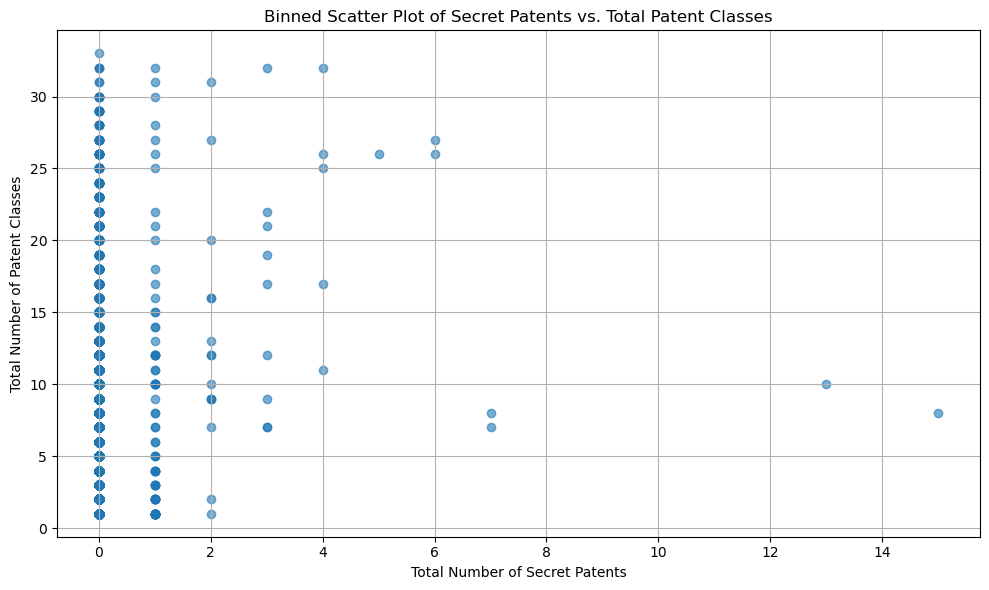

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['secret_patents'], final_df['nclass'], alpha=0.6)
plt.title('Binned Scatter Plot of Secret Patents vs. Total Patent Classes')
plt.xlabel('Total Number of Secret Patents')
plt.ylabel('Total Number of Patent Classes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
df['assignee'].value_counts()

assignee
GEN ELECTRIC                      180
BELL TELEPHONE LABOR INC          175
WESTINGHOUSE ELECTRIC & MFG CO    170
DU PONT                           165
GEN MOTORS CORP                   165
                                 ... 
GUSTAF BERGSTROM KARL               5
GUSTAF BERGMAN                      5
GUSTAF AHNSTROM ERIK                5
GUSTAAF ADOLF FRISCH                5
ZYWIECKA HELEN M                    5
Name: count, Length: 392717, dtype: int64

<Figure size 1000x600 with 0 Axes>

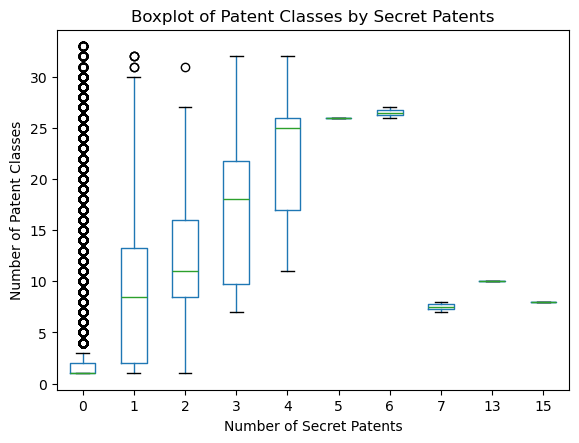

In [24]:
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='nclass', by='secret_patents', grid=False)

# 添加标题和标签
plt.title('Boxplot of Patent Classes by Secret Patents')
plt.suptitle('')  # 移除默认的上标题
plt.xlabel('Number of Secret Patents')
plt.ylabel('Number of Patent Classes')
plt.show()

- 复制主要回归结果

  - 复制Table 4的主要回归结果，使用最大似然估计（MLE）替代OLS进行回归，结果应以格式化表格形式展示。
  - 使用clogit命令进行公司固定效应回归，并控制标准误在公司层面上聚类，解释为何有些观测值会被丢弃。

In [29]:
data['nber_cat'].value_counts()

nber_cat
69    428560
59    255515
51    219465
19    183675
65    147210
63    142785
55    130755
61    126650
53    125960
68     93725
41     83895
52     82075
66     60650
43     55325
64     55110
45     53375
12     48680
62     48660
67     48385
21     45555
49     42175
42     39185
32     37690
54     23310
14     21755
11     15845
13     15540
44     15015
31     14825
22     14725
15     14620
39     12775
24     10535
46      1655
23      1065
25       715
33        20
Name: count, dtype: int64